# TARGET Analysis Tutorial
This file provides a brief tutorial on how to use the functions in the 'TARGET_Analysis_Functions_v2.ipynb' file. The functions described below conduct gene expression analysis on publicly-available data from the Therapeutically Applicable Research to Generate Effective Treatments (TARGET) initiative. They specifically analyze Affymetrix Exon ST microarray data from 249 neuroblastoma samples. The data was downloaded directly from the cBio Cancer Genomics Portal at https://www.cbioportal.org/study/summary?id=nbl_target_2018_pub and can be found in the 'neuroblastoma_gene_expression_analysis_files/nbl_target_2018_pub' folder within the 'bbergsneider/Neuroblastoma_Gene_Expression_Analysis' GitHub directory. To learn more about the TARGET neuroblastoma initiative and how the dataset was obtained, please refer to: https://ocg.cancer.gov/programs/target/projects/neuroblastoma

In order to use the functions in 'TARGET_Analysis_Functions_v2.ipynb' in a separate file, you must ensure that 'TARGET_Analysis_Functions_v2.ipynb' is in the same directory as the file you are using and import the functions using the following command:

In [1]:
from ipynb.fs.full.TARGET_Analysis_Functions_v2 import *

## Functions for Stratifying Data
The functions below divide neuroblastoma samples in the TARGET study into different groups based on clinical characteristics.

##### 1. Stratify Numerical Patient Data:
This function allows you to stratify samples based on numerical information within the 'data_clinical_patient.txt' file. This file contains clinical information on the patients from which the tumor samples were derived. The most relevant columns you will want to stratify samples on are: 'Diagnosis Age (days)', 'EFS Time', and 'Overall Survival Days'. You need to input (1) the column you want to stratify samples on, and (2) the numerical threshold you want to stratify on. The function will return a 2-D array containing two lists: the first will contain all samples with a column value less than the threshold and the second all samples with a column value greater than or equal to the threshold. For example, you can divide TARGET samples into those with <5yr (1825 days) EFS and those with >=5yr EFS by simply writing:

In [2]:
efs_stratified_samples = stratifyNumericalPatientData('EFS Time',1825)
print(efs_stratified_samples)

[4       TARGET-30-PAUDVA-09
7       TARGET-30-PATTEF-01
8       TARGET-30-PATTDY-01
11      TARGET-30-PARLTG-01
12      TARGET-30-PAURYJ-01
               ...         
1086    TARGET-30-PANBMJ-01
1087    TARGET-30-PAUPRN-01
1088    TARGET-30-PARZZC-01
1089    TARGET-30-PAUHYY-01
1091    TARGET-30-PASUYG-01
Name: Sample Identifier, Length: 694, dtype: object, 5       TARGET-30-PASCKI-01
6       TARGET-30-PARXAX-01
9       TARGET-30-PALXTE-01
10      TARGET-30-PALPSY-01
13      TARGET-30-PAITZV-01
               ...         
1078    TARGET-30-PAIBIW-01
1079    TARGET-30-PASSII-01
1085    TARGET-30-PAMYVA-01
1090    TARGET-30-PASFXS-01
1092    TARGET-30-PATNPW-01
Name: Sample Identifier, Length: 391, dtype: object]


##### 2. Statify Categorical Patient Data:
This function is very similar to the one above; however, it allows you to stratify samples based on data in 'data_clinical_patient.txt' that is binary/categorical rather than continuous. The most relevant columns you will likely want to stratify samples on are: 'INSS Stage', 'Tumor Sample Histology', 'Diagnosis', 'Sex', 'Ethnicity Category', 'Risk Group', 'First Event', and 'Overall Survival Status'. You need to input (1) the column you want to stratify samples on and (2) a list of the relevant categories within that column. The function will return a 2-D array containing lists of samples, one for each of the categories specified. For example, you can divide TARGET samples into those with Unfavorable vs Favorable Tumor Sample Histology by simply writing:

In [3]:
histology_stratified_samples = stratifyCategoricalPatientData('Tumor Sample Histology',['Unfavorable','Favorable'])
print(histology_stratified_samples)

[4       TARGET-30-PAUDVA-09
5       TARGET-30-PASCKI-01
8       TARGET-30-PATTDY-01
11      TARGET-30-PARLTG-01
13      TARGET-30-PAITZV-01
               ...         
1087    TARGET-30-PAUPRN-01
1088    TARGET-30-PARZZC-01
1089    TARGET-30-PAUHYY-01
1091    TARGET-30-PASUYG-01
1092    TARGET-30-PATNPW-01
Name: Sample Identifier, Length: 721, dtype: object, 7       TARGET-30-PATTEF-01
9       TARGET-30-PALXTE-01
10      TARGET-30-PALPSY-01
12      TARGET-30-PAURYJ-01
15      TARGET-30-PATVMF-01
               ...         
1071    TARGET-30-PASUCU-01
1072    TARGET-30-PATAFE-01
1079    TARGET-30-PASSII-01
1080    TARGET-30-PATUNK-01
1081    TARGET-30-PASKZT-01
Name: Sample Identifier, Length: 281, dtype: object]


##### 3. Statify Categorical Sample Data:
This function allows you to stratify samples based on categorical data in the 'data_clinical_sample.txt' file. This file contains experimental information on the tumor samples themselves. The most relevant columns you will likely want to stratify samples on are: 'MYCN', 'PLOIDY', 'GRADE', and 'MKI'. Just like the function above, you need to input (1) the column you want to stratify samples on and (2) a list of the relevant categories within that column. The function will return a 2-D array containing lists of samples, one for each of hte categories specified. For example, you can divide TARGET samples by MYCN amplification by simply writing:

In [4]:
mycn_stratified_samples = stratifyCategoricalSampleData('MYCN',['Not Amplified','Amplified'])
print(mycn_stratified_samples)

[5       TARGET-30-PASCKI-01
6       TARGET-30-PARXAX-01
7       TARGET-30-PATTEF-01
8       TARGET-30-PATTDY-01
9       TARGET-30-PALXTE-01
               ...         
1087    TARGET-30-PAUPRN-01
1088    TARGET-30-PARZZC-01
1089    TARGET-30-PAUHYY-01
1090    TARGET-30-PASFXS-01
1091    TARGET-30-PASUYG-01
Name: Sample Identifier, Length: 770, dtype: object, 4       TARGET-30-PAUDVA-09
21      TARGET-30-PAUSXH-01
23      TARGET-30-PALHTR-01
29      TARGET-30-PAPGJR-01
31      TARGET-30-PAUFPG-01
               ...         
1074    TARGET-30-PASMET-01
1075    TARGET-30-PATKPD-01
1076    TARGET-30-PAULVH-01
1078    TARGET-30-PAIBIW-01
1092    TARGET-30-PATNPW-01
Name: Sample Identifier, Length: 303, dtype: object]


##### 4. Stratify Data on Gene Expression (2 Groups):
This function allows you to stratify samples based on expression of a single gene of interest, using z-scores in the 'data_mRNA_median_all_sample_Zscores.txt' file, which contains log-transformed mRNA z-scores calculated by comparing the expression of each gene in each sample to the expression of the gene across all samples. In order to use this function, you need to input: (1) the gene of interest, (2) the lower z-score threshold, and (3) the upper z-score threshold. The function outputs a 2-D array containing two lists: the first contains all samples with a gene z-score less than the lower threshold, and the second contains all samples with a gene z-score greater than the upper threshold. For example, if you want to stratify TARGET samples based on expression of the NTRK1 (using -0.5 and 0.5 as the lower and upper cutoffs), you can simply write:

In [5]:
ntrk1_stratified_samples_two_groups = stratifyDataOnGeneExpression_twoGroups('NTRK1',-0.5,0.5)
print(ntrk1_stratified_samples_two_groups)



[Index(['TARGET-30-PAAPFA-01', 'TARGET-30-PACUGP-01', 'TARGET-30-PACVNB-01',
       'TARGET-30-PACZPX-01', 'TARGET-30-PADFLI-01', 'TARGET-30-PADINC-01',
       'TARGET-30-PADIRB-01', 'TARGET-30-PADKNE-01', 'TARGET-30-PADKRU-01',
       'TARGET-30-PADKYP-01', 'TARGET-30-PADLDA-01', 'TARGET-30-PADLDT-01',
       'TARGET-30-PADLKJ-01', 'TARGET-30-PADLNM-01', 'TARGET-30-PADLTD-01',
       'TARGET-30-PADMTD-01', 'TARGET-30-PADMYD-01', 'TARGET-30-PADNXC-01',
       'TARGET-30-PADPEY-01', 'TARGET-30-PADRYN-01', 'TARGET-30-PADTJJ-01',
       'TARGET-30-PADUYJ-01', 'TARGET-30-PADWEN-01', 'TARGET-30-PAIRDP-01',
       'TARGET-30-PAITCI-01', 'TARGET-30-PAIUJB-01', 'TARGET-30-PAIVZR-01',
       'TARGET-30-PAIXNG-01', 'TARGET-30-PAJYVA-01', 'TARGET-30-PAJZUU-01',
       'TARGET-30-PAKACY-01', 'TARGET-30-PAKANZ-01', 'TARGET-30-PAKGMY-01',
       'TARGET-30-PAKJBA-01', 'TARGET-30-PAKXDZ-01', 'TARGET-30-PALBFV-01',
       'TARGET-30-PALIIN-01', 'TARGET-30-PALKUC-01', 'TARGET-30-PALNHZ-01',
       'TAR

##### 5. Stratify Data on Gene Expression (3 Groups):
This function is similar to the one above, except that it splits samples into three groups: the first contains all samples with a z-score less than the lower threshold, the second contains all samples with a z-score in-between the lower and upper thresholds, and the third contains all samples with a z-score greater than the upper threshold. The inputs are the same as the function above. For example, we can again split samples based on NTRK1 expression, but instead splitting samples into three groups this time, by simply writing:

In [6]:
ntrk1_stratified_samples_three_groups = stratifyDataOnGeneExpression_threeGroups('NTRK1',-0.5,0.5)
print(ntrk1_stratified_samples_three_groups)

[Index(['TARGET-30-PAAPFA-01', 'TARGET-30-PACUGP-01', 'TARGET-30-PACVNB-01',
       'TARGET-30-PACZPX-01', 'TARGET-30-PADFLI-01', 'TARGET-30-PADINC-01',
       'TARGET-30-PADIRB-01', 'TARGET-30-PADKNE-01', 'TARGET-30-PADKRU-01',
       'TARGET-30-PADKYP-01', 'TARGET-30-PADLDA-01', 'TARGET-30-PADLDT-01',
       'TARGET-30-PADLKJ-01', 'TARGET-30-PADLNM-01', 'TARGET-30-PADLTD-01',
       'TARGET-30-PADMTD-01', 'TARGET-30-PADMYD-01', 'TARGET-30-PADNXC-01',
       'TARGET-30-PADPEY-01', 'TARGET-30-PADRYN-01', 'TARGET-30-PADTJJ-01',
       'TARGET-30-PADUYJ-01', 'TARGET-30-PADWEN-01', 'TARGET-30-PAIRDP-01',
       'TARGET-30-PAITCI-01', 'TARGET-30-PAIUJB-01', 'TARGET-30-PAIVZR-01',
       'TARGET-30-PAIXNG-01', 'TARGET-30-PAJYVA-01', 'TARGET-30-PAJZUU-01',
       'TARGET-30-PAKACY-01', 'TARGET-30-PAKANZ-01', 'TARGET-30-PAKGMY-01',
       'TARGET-30-PAKJBA-01', 'TARGET-30-PAKXDZ-01', 'TARGET-30-PALBFV-01',
       'TARGET-30-PALIIN-01', 'TARGET-30-PALKUC-01', 'TARGET-30-PALNHZ-01',
       'TAR

## Function for comparing expression of a single gene between multiple groups
This function allows you to compare expression of a gene of interest between the groups you obtained using the functions in the previous section.

##### 1. Compare Expression:
This function compares the expression of a gene of interest between multiple groups using z-scores from 'data_mRNA_median_all_sample_Zscores.txt'. The inputs to the function are: (1) The gene you want to analyze, (2) a 2-D array containing lists of the groups you want to compare (output of the functions above), (3) your title for the boxplot graph, (4) a list containing the labels of each category, and (5) the type of statistical test you want to compare groups with (use 't-test_ind' to run an independent t-test, see this page for a list of other tests you can run: https://github.com/webermarcolivier/statannot). The function will print a boxplot of the gene expression compared between the groups, the results of the statistical test you chose, and summary statistics for each group (median, mean, and 95% CI). For example, if you want to compare TP53 expression between samples stratified by 5-year EFS, you can use the stratifyNumericalPatientData function in the previous section and this function to do so by writing:

<5 yrs v.s. >=5yrs: t-test independent samples, P_val=5.482e-04 stat=3.502e+00


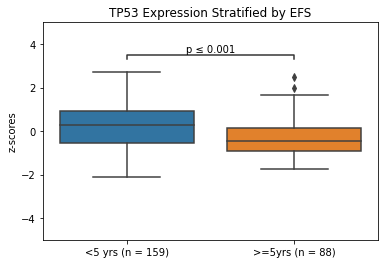

<5 yrs: median = 0.266, mean = 0.15824842767295597, 95% CI = (-0.0010545829122004247, 0.3175514382581124)
>=5yrs: median = -0.45935, mean = -0.29748863636363637, 95% CI = (-0.48362309102274037, -0.11135418170453237)


In [7]:
efs_stratified_samples = stratifyNumericalPatientData('EFS Time',1825)
compareExpression('TP53',efs_stratified_samples,'TP53 Expression Stratified by EFS',['<5 yrs','>=5yrs'],'t-test_ind')



## Function for comparing EFS between multiple groups
This function allows you to compare the Event Free Survival (EFS) distributions between the groups that you obtained using the functions in the first section.

##### 1. Compare EFS:
This function compares the EFS distributions between multiple groups. Inputs to the function are: (1) The groups you want to compare, (2) your title for the boxplot graph, (3) a list containing labels for each category, and (4) the type of statistical test you want to compare groups with. The function prints a boxplot of the EFS compared between the groups, the results of the statistical test you chose, and summary statistics for each group. For example, if you want to compare the EFS distribution between samples with and without MYCN amplification, you can use the stratifyCategoricalSampleData function and this function to do so by writing:

Not Amplified v.s. Amplified: t-test independent samples, P_val=4.497e-07 stat=5.078e+00


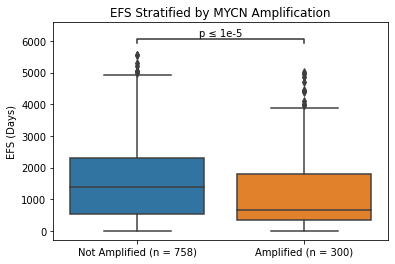

Not Amplified: median = 1402.0, mean = 1572.4868073878629, 95% CI = (1486.9114767046729, 1658.062138071053)
Amplified: median = 676.0, mean = 1166.6666666666667, 95% CI = (1043.2785122649004, 1290.054821068433)


In [8]:
mycn_stratified_samples = stratifyCategoricalSampleData('MYCN',['Not Amplified','Amplified'])
compareEFS(mycn_stratified_samples, 'EFS Stratified by MYCN Amplification', ['Not Amplified','Amplified'], 't-test_ind')




## Function for making Kaplan-Meier curves comparing multiple groups
This function makes Kaplan-Meier curves based on Event Free Survival (EFS) for comparing the groups that you obtained using the functions in the first section.

##### 1. Kaplan-Meier EFS:
This function makes Kaplan-Meier curves based on EFS for comparing multiple groups. Inputs to the function are: (1) A 2-D array containing lists of the groups you want to compare, (2) your title for the graph, and (3) a list containing labels for each category. The function will print Kaplan-Meier curve, the median survival time and probability of 5yr EFS for each group, and the results of comparing each group to each other with the log-rank test. For example, if we want to make Kaplan-Meier curves of groups stratified by NTRK1 expression, we can use the stratifyDataOnGeneExpression_threeGroups function and this function to do so by writing:

Low median survival time = 1.5863013698630137
Low probability of 5yr EFS = 0.2662878787878788
Intermediate median survival time = 1.9863013698630136
Intermediate probability of 5yr EFS = 0.381125226860254
High median survival time = 13.446575342465753
High probability of 5yr EFS = 0.5326416159145956


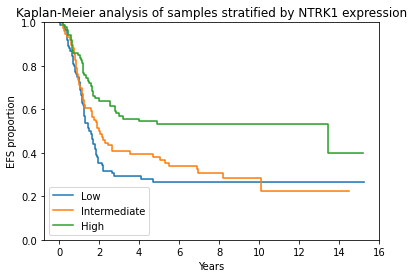

Log Rank Test between Low and Intermediate


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.86 0.35      1.50

p-value = 0.3539337358369532
Log Rank Test between Low and High


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          13.33 <0.005     11.90

p-value = 0.0002612323652489673
Log Rank Test between Intermediate and High


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
           8.54 <0.005      8.17

p-value = 0.003481742043722444


In [9]:
ntrk1_stratified_samples_three_groups = stratifyDataOnGeneExpression_threeGroups('NTRK1',-0.5,0.5)
kaplanmeierEFS(ntrk1_stratified_samples_three_groups, 'Kaplan-Meier analysis of samples stratified by NTRK1 expression', ['Low','Intermediate','High'])




## Function for making a scatter plot of z-scores between two genes
This function makes a scatter plot for comparing the z-scores of two genes across all TARGET samples. It lets you compare whether or not two genes are correlated.

##### 1. Gene Scatter:
This function makes a scatter plot for comparing the z-scores of two genes across all TARGET samples. Inputs: (1) gene you want to be plotted on the x-axis and (2) gene to be plotted on the y-axis. The function outputs a scatter plot that includes a line of best fit, as well as the results of a pearson's correlation test. For example, if you want to compare the expression of TP53 and NTRK1 across all TARGET samples, you can simply do so with the code:

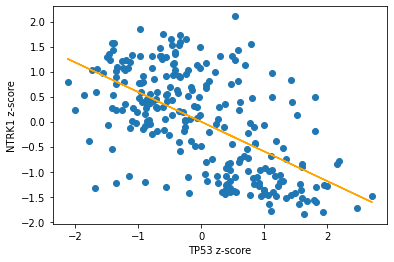

Pearson correlation coefficient = -0.5937294768334125
p-value = 4.123929928064985e-25


In [10]:
geneScatter('TP53','NTRK1')